# Lab 01 : MLP -- exercise

# Understanding the training loop 

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'mlp_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/AI6103_2020_codes/codes/labs_lecture05/lab01_mlp'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()


In [4]:
train_data=torch.load(data_path+'fashion-mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [5]:
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [6]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a ONE layer net class. The network output are the scores! No softmax needed! You have only one line to write in the forward function

In [7]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer =  nn.Linear(input_size, output_size, bias = False)
        
    def forward(self, x):
        scores = self.linear_layer(x)  # complete here
        return scores

### Build the net

In [8]:
net= one_layer_net(28*28, 10) # complete here
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion and the optimizer: use the CHEAT SHEET to see the correct syntax. 

### Remember that the optimizer need to have access to the parameters of the network (net.parameters()).

### Set the batchize and learning rate to be:
### batchize = 50
### learning rate = 0.01







In [9]:
# make the criterion
criterion = nn.CrossEntropyLoss() # complete here

# make the SGD optimizer. 
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)

# set up the batch size   
bs=50

### Complete the training loop

In [10]:
for iter in range(1,5000):
    
    # Set dL/dU, dL/dV, dL/dW to be filled with zeros
    optimizer.zero_grad()
     
    # create a minibatch
    indices = torch.LongTensor(bs).random_(0,60000)
    train = train_data[indices] # bs x 28 x 28
    labels = train_label[indices] # bs
    
    # reshape the minibatch
    inputs = train.view(bs, 28*28)
    
    # tell Pytorch to start tracking all operations that will be done on "inputs"
    inputs.requires_grad_()

    # forward the minibatch through the net  
    scores = net(inputs) 
    
    # Compute the average of the losses of the data points in the minibatch
    loss = criterion(scores , labels) 
    
    # backward pass to compute dL/dU, dL/dV and dL/dW    
    loss.backward()
    
    # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
    optimizer.step()
    

### Choose image at random from the test set and see how good/bad are the predictions

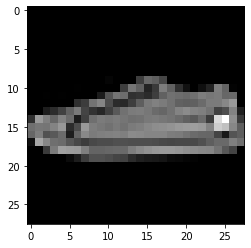

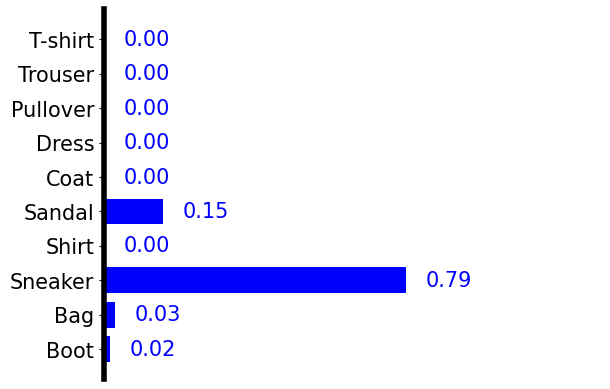

In [11]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_fashion_mnist(probs)